In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler 

#Setting to make numbers easier to read on display
pd.options.display.float_format

#show all columns on output
pd.set_option('display.max_columns',999)

# Data Exploration 

In [2]:
df=pd.read_excel("C:\\Users\\sange\\OneDrive\\Desktop\\K means clustering\\online_retail_II.xlsx")
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [5]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df["Customer ID"].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [7]:
df[df["Quantity"]<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [8]:
df["Invoice"]=df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [9]:
df["Invoice"].str.replace("[0-9]","", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
df.StockCode=df["StockCode"].astype(str)
df[df["StockCode"].str.match("^\\d{5}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [12]:
df["StockCode"].str.replace("[0-9]","",regex=True).unique()

array(['', 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS', 'DOT', 'U', 'b',
       'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V', 'T', 'I',
       'BANK CHARGES', 'O', 'Z', 'TEST', 'gift__', 'DCGSN', 'm', 'PADS',
       'Y', 'HC', 'e', 'd', 'ADJUST', 'DCGSSGIRL', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGSSBOY', 'DCGSLGIRL', 'j', 'l', 'n', 'J ', 'SP',
       'AMAZONFEE'], dtype=object)

In [13]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [14]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


# Data Cleaning

In [15]:
cleaned_df=df.copy() #creating a copy of the dataframe for data cleaning

In [16]:
cleaned_df["Invoice"]=cleaned_df["Invoice"].astype(str) #To clean the Invoice column, changing it to string datatype 
mask=cleaned_df["Invoice"].str.match("^\\d{6}$") # Filtering column that matchs only six digit invoice
cleaned_df=cleaned_df[mask] # mask is a temporary variable that stores filtering conditions
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [17]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str") # Changing the [StockCode] column type to string to perfrom the string functions on it

mask=(
    cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") |  # Will be included if the Stockcode is five numbers along with alphabets
      cleaned_df["StockCode"].str.match("^\\d{5}$") |  # will include the values, when the values are only five digits
      cleaned_df["StockCode"].str.match("^PADS$") # Since PADS stocks code legetimate, the data  containing the PADS stockcode will be included
    )

cleaned_df=cleaned_df[mask]

In [18]:
cleaned_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [19]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.000000,512796,512796.000000,406337.000000
mean,11.001279,2010-06-28 18:26:52.709732352,3.391447,15373.632992
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-21 13:27:00,1.250000,14004.000000
50%,3.000000,2010-07-06 14:25:00,2.100000,15326.000000
75%,10.000000,2010-10-15 14:50:00,4.210000,16814.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,104.352433,NaN,5.067864,1677.365907


In [20]:
cleaned_df[cleaned_df["Customer ID"].isna()] #Checking the null values of customer ID

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [21]:
cleaned_df.dropna(subset=["Customer ID"],inplace=True) #removing the null values of customer ID

C:\Users\sange\AppData\Local\Temp\ipykernel_8608\1290290701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"],inplace=True) #removing the null values of customer ID


In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [23]:
cleaned_df["Price"].min() # minimum price of an items is still found to be zero

0.0

In [24]:
len(cleaned_df[cleaned_df["Price"]==0])#To see how many data is zero in our data

28

In [25]:
cleaned_df=cleaned_df[cleaned_df["Price"]>0] #filtering the price which is greater than  0 in cleaned_df

In [26]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [27]:
len(cleaned_df)/len(df) # To find the percentage of data we lost during the cleaning process

0.7732429238325965

we proceed with the 77% data of the original data for analysis

# Feature Engineering

In [28]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"]*cleaned_df["Price"] #Creating new column -SalesLineTotal as an multiplication of Quantity and Price

In [29]:
cleaned_df

cleaned_df.to_csv('data_without_clusters.csv') # Cleaned data is explored

In [30]:
aggregated_df=cleaned_df.groupby(by="Customer ID",as_index=False) \
    .agg(
    MonetaryValue=("SalesLineTotal","sum"),
    Frequency=("Invoice","nunique"),
    LastInvoiceDate =("InvoiceDate","max")
    )

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [31]:
maxInvoiceDate=aggregated_df["LastInvoiceDate"].max() # max of LastInvoiceDateused to determine the recency of the invoice data
#In realworld data,we will use today for the reference of recency
maxInvoiceDate

Timestamp('2010-12-09 20:01:00')

In [32]:
aggregated_df["Recency"]=(maxInvoiceDate-aggregated_df["LastInvoiceDate"]).dt.days #Date difference between the maximum date and last invoice date

aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17
4281,18284.0,411.68,1,2010-10-04 11:33:00,66
4282,18285.0,377.00,1,2010-02-17 10:24:00,295
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111


Text(0, 0.5, 'Count')

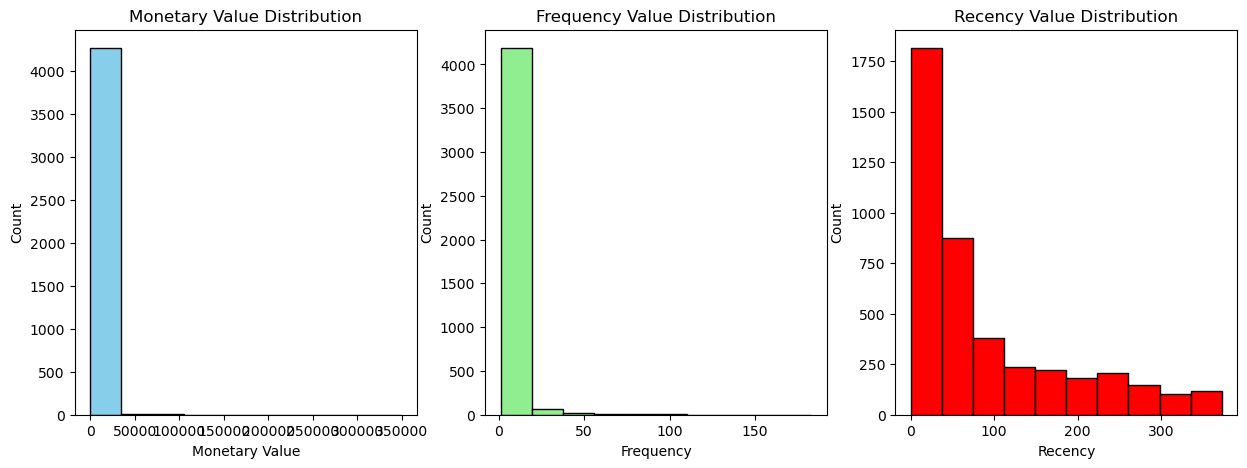

In [33]:
# To identify the outliers, we are using the histogram to see the distribution of our RFM values

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["MonetaryValue"],bins=10,color='skyblue',edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"],bins=10,color='Lightgreen',edgecolor='black')
plt.title('Frequency Value Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"],bins=10,color='red',edgecolor='black')
plt.title('Recency Value Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')


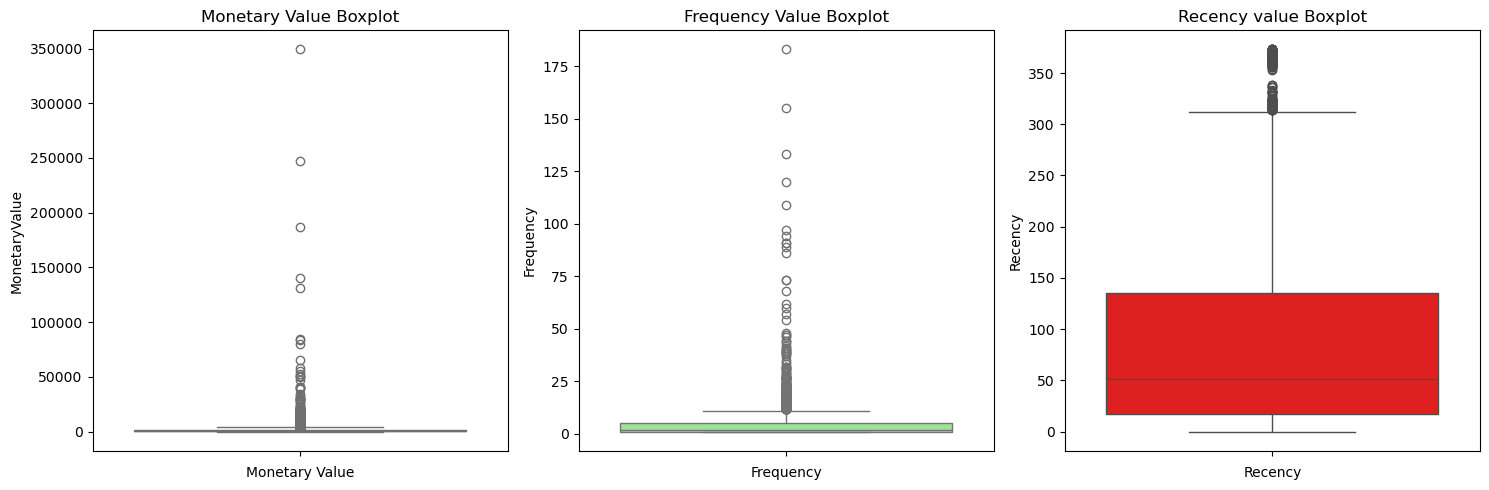

In [34]:
#For regorous outlier detection, we are moving forwards with the boxplot of seaborn

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df["MonetaryValue"],color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')


plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df['Frequency'],color='lightgreen')
plt.title('Frequency Value Boxplot')
plt.xlabel('Frequency')


plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df['Recency'],color='red')
plt.title('Recency value Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()



In [35]:
#interpolation  method to eliminate the outliers

M_Q1=aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3=aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR=M_Q3-M_Q1

M_IQR

Monetary_outlier_df=aggregated_df[(aggregated_df['MonetaryValue']>(M_Q3+1.5*M_IQR))| (aggregated_df['MonetaryValue']<(M_Q1-1.5*M_IQR))].copy()
Monetary_outlier_df


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.0,11229.99,1,2010-11-16 10:05:00,23
25,12380.0,4782.84,4,2010-08-31 14:54:00,100
42,12409.0,12346.62,4,2010-10-15 10:24:00,55
48,12415.0,19468.84,4,2010-11-29 15:07:00,10
61,12431.0,4145.52,11,2010-12-01 10:03:00,8
...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41
4253,18251.0,21964.14,8,2010-09-20 13:26:00,80


In [36]:
Monetary_outlier_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [37]:
F_Q1=aggregated_df['Frequency'].quantile(0.25)      
F_Q3=aggregated_df['Frequency'].quantile(0.75)     
F_IQR=F_Q3-F_Q1

F_IQR

Frequency_outlier_df=aggregated_df[(aggregated_df['Frequency']>(F_Q3+1.5*F_IQR)) | (aggregated_df['Frequency']<(F_Q1-1.5*F_IQR))]

Frequency_outlier_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
65,12437.0,6834.99,20,2010-11-09 14:46:00,30
84,12471.0,17721.45,44,2010-11-30 14:35:00,9
85,12472.0,10426.48,13,2010-12-05 14:19:00,4
92,12482.0,21941.72,27,2010-05-12 16:51:00,211
115,12523.0,2330.38,12,2010-11-30 12:31:00,9
...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14


In [38]:
Frequency_outlier_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [39]:
non_outliers_df=aggregated_df[(~aggregated_df.index.isin(Monetary_outlier_df.index))&(~aggregated_df.index.isin(Frequency_outlier_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


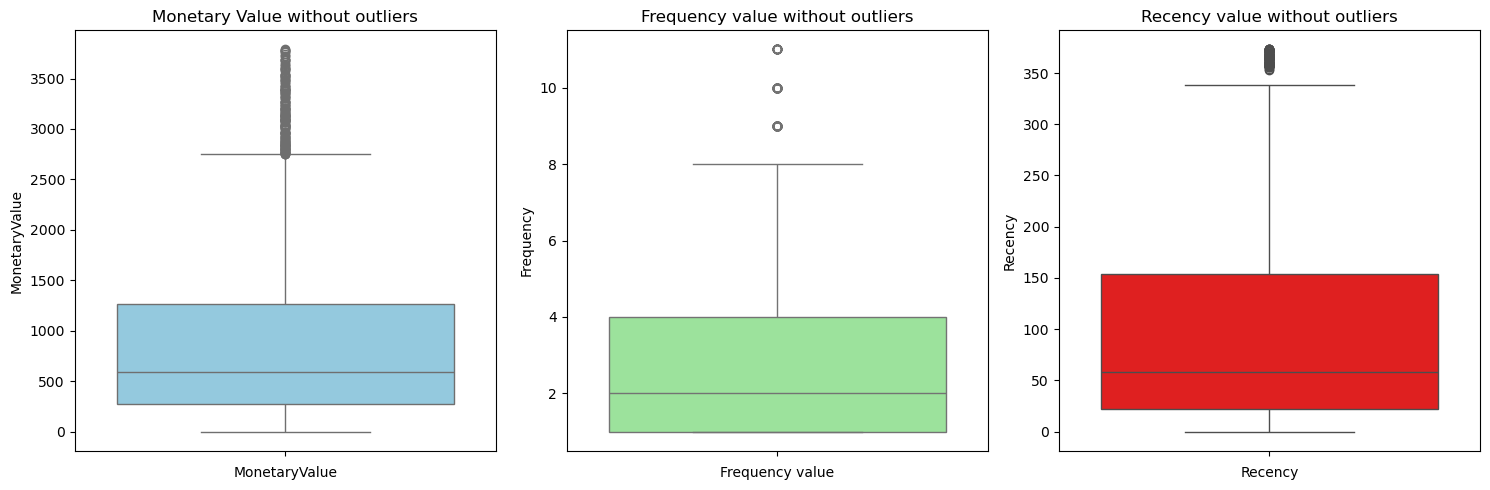

In [40]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df['MonetaryValue'],color='skyblue')
plt.title('Monetary Value without outliers')
plt.xlabel('MonetaryValue')

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df['Frequency'],color='lightgreen')
plt.title('Frequency value without outliers')
plt.xlabel('Frequency value')

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df['Recency'],color='red')
plt.title('Recency value without outliers')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

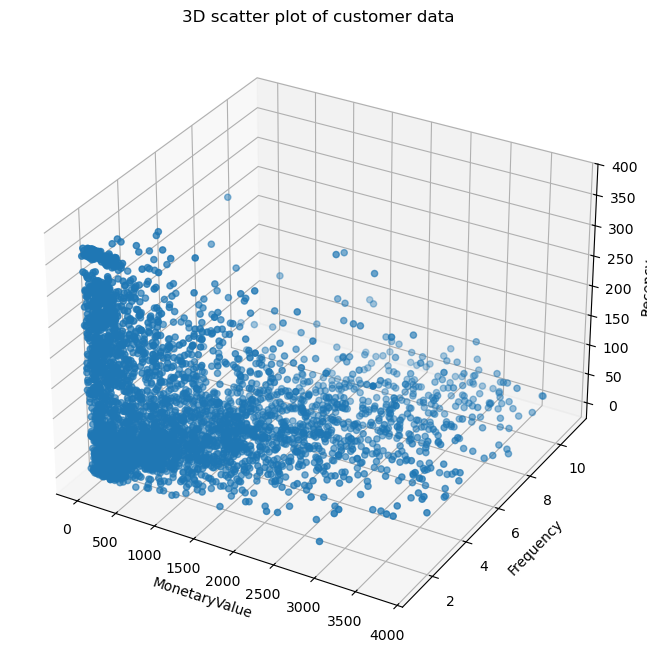

In [41]:
from mpl_toolkits.mplot3d import Axes3D  

fig= plt.figure(figsize=(8,8))

ax=fig.add_subplot(projection="3d")

scatter=ax.scatter(non_outliers_df["MonetaryValue"],non_outliers_df["Frequency"],non_outliers_df["Recency"])

ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D scatter plot of customer data')
plt.show()



Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

 z=x-mean/SD

Where:

 z is the standardized value,
 x is the original value,
 mean is the mean of the feature,
 SD is the standard deviation of the feature.


In [42]:
scalar=StandardScaler()

scaled_data=scalar.fit_transform(non_outliers_df[["MonetaryValue","Frequency","Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [43]:
scaled_df=pd.DataFrame(scaled_data,index=non_outliers_df.index,columns=("MonetaryValue","Frequency","Recency"))

scaled_df

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


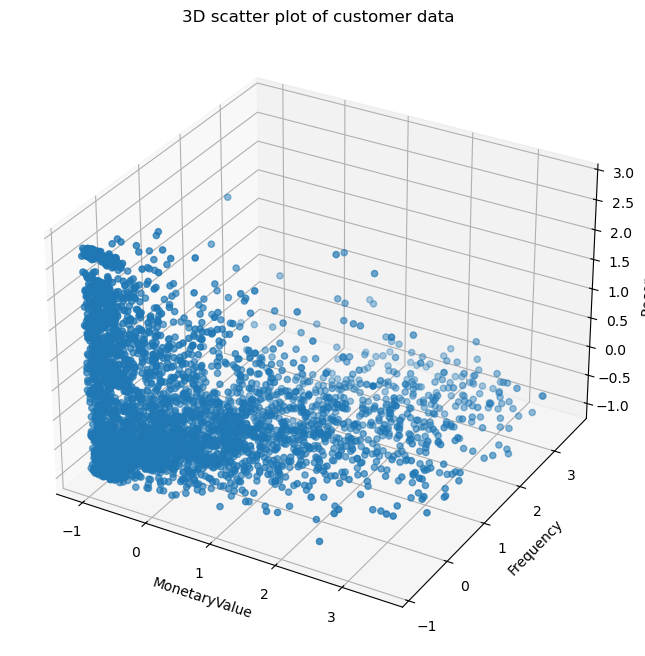

In [44]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_df["MonetaryValue"], scaled_df["Frequency"], scaled_df["Recency"])

ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D scatter plot of customer data')
plt.show()



# KMeans Clustering


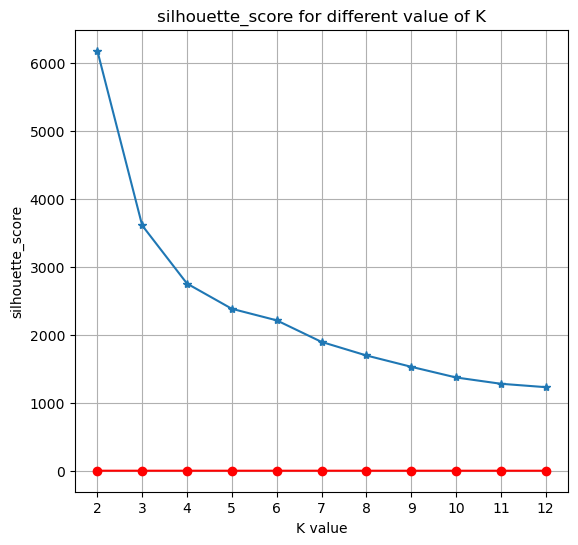

In [45]:
inertia=[]

silhouette=[]

for k in range(2,13):


    kmeans=KMeans(n_clusters=k,random_state=42,max_iter=1000)

    clustered_data = kmeans.fit_predict(scaled_df)

    sil_score= silhouette_score(scaled_df,clustered_data)

    silhouette.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(range(2,13),inertia, marker='*')
plt.title('KMeans inertia for different value of K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(2,13))
plt.grid(True)

plt.plot(range(2,13),silhouette,marker='o',color='red')
plt.title('silhouette_score for different value of K')
plt.xlabel('K value')
plt.ylabel('silhouette_score')
plt.grid(True)

plt.tight_layout
plt.show()

Silhouette_Score[s(i)]=(b(i)-a(i))/max⁡(a(i),b(i))

Silhouette_Score measures both inter and intra cluster distance, it takes both the cluster compactness and separation from other clusters

b(i)=distance between this point (i) and near clusters
a(i)=distance between this point(i) and other points of the same cluster


In [46]:
Kmeans=KMeans(n_clusters=4,random_state=42,max_iter=1000)

clustered_Data=Kmeans.fit_predict(scaled_data)

clustered_Data

array([1, 0, 2, ..., 1, 0, 0])

In [47]:
non_outliers_df['clusters'] = clustered_Data

non_outliers_df

C:\Users\sange\AppData\Local\Temp\ipykernel_8608\4192091125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['clusters'] = clustered_Data


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,clusters
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


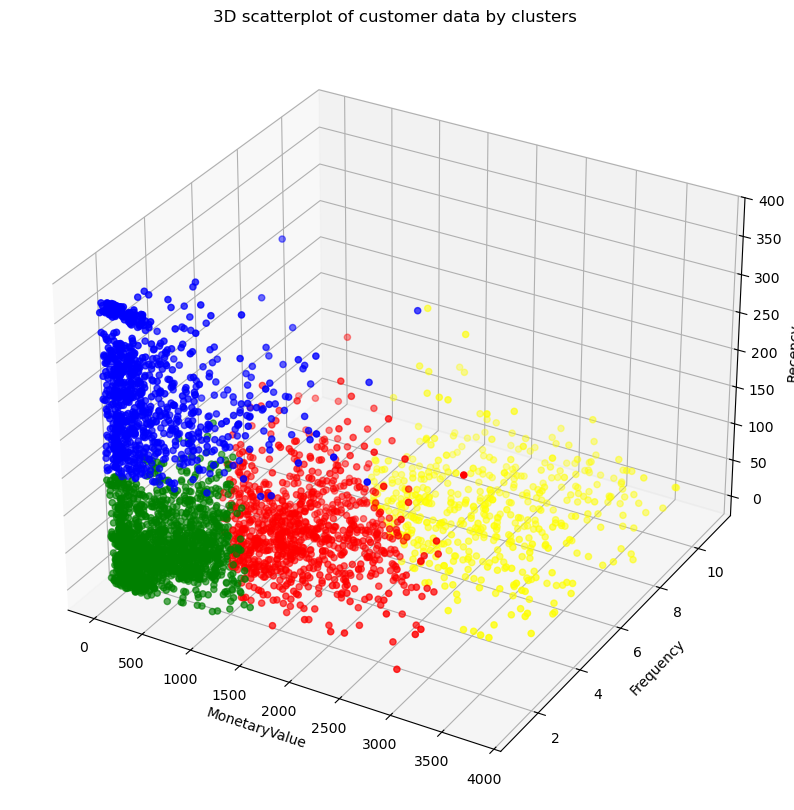

In [48]:
cluster_colors={0:'red',
                1:'blue',
                2:'green',
                3:'yellow'
}

colors=non_outliers_df['clusters'].map(cluster_colors)

fig=plt.figure(figsize=(10,10))

axes=fig.add_subplot(projection='3d')

scatter=axes.scatter(non_outliers_df["MonetaryValue"],non_outliers_df["Frequency"],non_outliers_df["Recency"],c=colors,marker='o')

axes.set_title('3D scatterplot of customer data by clusters')

axes.set_xlabel('MonetaryValue')
axes.set_ylabel('Frequency')
axes.set_zlabel('Recency')

plt.show()



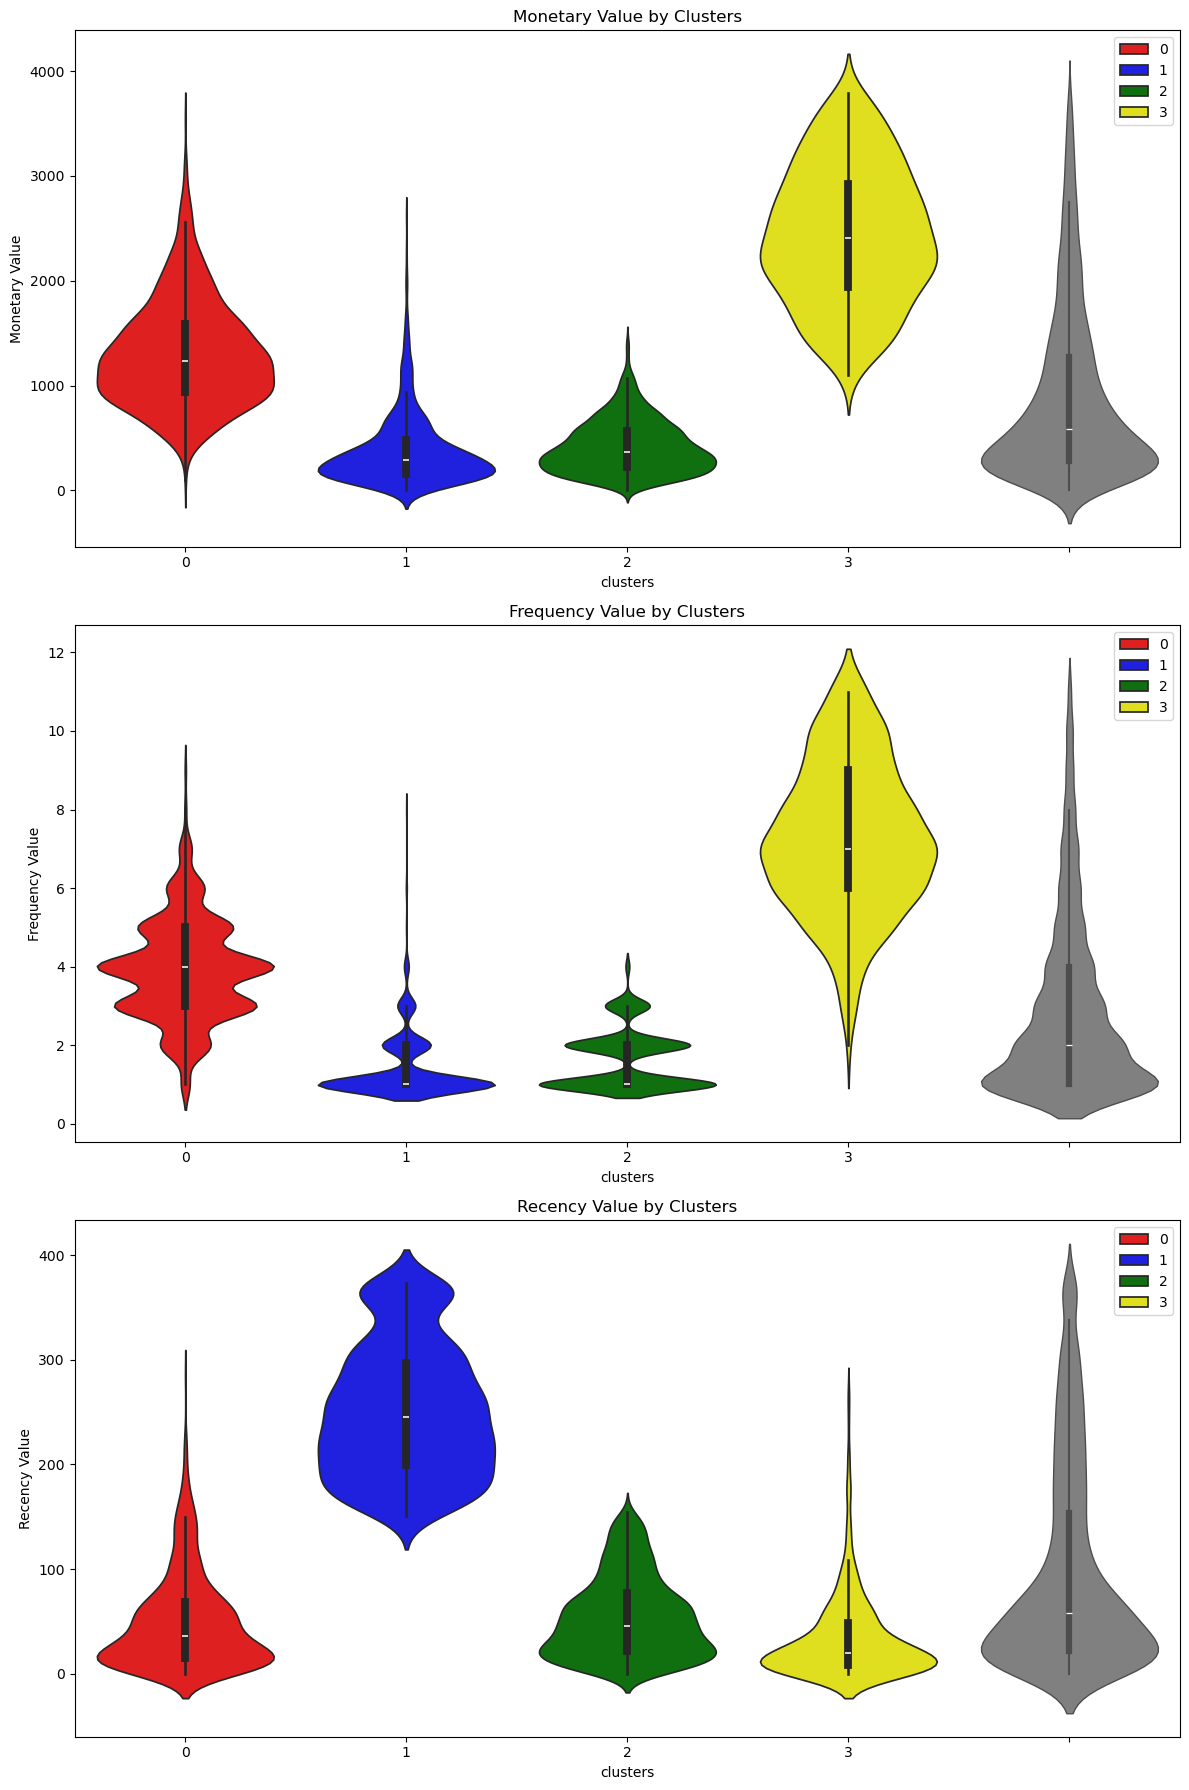

In [49]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['clusters'],y=non_outliers_df['MonetaryValue'],palette=cluster_colors,hue=non_outliers_df['clusters'])
sns.violinplot(y=non_outliers_df['MonetaryValue'],color='gray',linewidth=1.0)
plt.title('Monetary Value by Clusters')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['clusters'],y=non_outliers_df['Frequency'],palette=cluster_colors,hue=non_outliers_df['clusters'])
sns.violinplot(y=non_outliers_df['Frequency'],color='gray',linewidth=1.0)
plt.title('Frequency Value by Clusters')
plt.ylabel('Frequency Value')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['clusters'],y=non_outliers_df['Recency'],palette=cluster_colors,hue=non_outliers_df['clusters'])
sns.violinplot(y=non_outliers_df['Recency'],color='gray',linewidth=1.0)
plt.title('Recency Value by Clusters')
plt.ylabel('Recency Value')

plt.tight_layout()
plt.show()



Cluster 0(red): RETAIN

    Rationale: This cluster represent the high value customer, who make ferquent purchase but have not made any recent purchase. We can focus on the retaining effort to maintain their loyalty and spending levels

    Action:Implement loyalty programs, personalized offers and regular engagement

Cluster 1: Re-Engage

    This cluster represent low-value, non-frequent buyers who have not purchased recently. The focus should be on the re-engagement to bring them back into active purchasing behaviour

    Action: Use targeter market campaign, special duscount and reminders to encourage them to purchase again

cluster 2: NURTURE

    This cluster represent low-Value, non-frequent buyer who made a recent purchase. The focus should be on the increasing their purchase amount and frequency.

    Action: Focus on building relationship,offering incentives to encourage more frequent buyers

cluster 3: REWARD

    This cluster represents high-value and high frequency buyer who made recent purchases. They are the most loyal buyes and focus should be on rewarding their loyalty

    Action: Loyalty program, provide exclusive offers

# Outliers Analysis

In [50]:
Monetary_outlier_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.0,11229.99,1,2010-11-16 10:05:00,23
25,12380.0,4782.84,4,2010-08-31 14:54:00,100
42,12409.0,12346.62,4,2010-10-15 10:24:00,55
48,12415.0,19468.84,4,2010-11-29 15:07:00,10
61,12431.0,4145.52,11,2010-12-01 10:03:00,8
...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41
4253,18251.0,21964.14,8,2010-09-20 13:26:00,80


In [51]:
Frequency_outlier_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
65,12437.0,6834.99,20,2010-11-09 14:46:00,30
84,12471.0,17721.45,44,2010-11-30 14:35:00,9
85,12472.0,10426.48,13,2010-12-05 14:19:00,4
92,12482.0,21941.72,27,2010-05-12 16:51:00,211
115,12523.0,2330.38,12,2010-11-30 12:31:00,9
...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14


In [52]:
overlap_index=Monetary_outlier_df.index.intersection(Frequency_outlier_df.index)


monetary_only_outliers=Monetary_outlier_df.drop(overlap_index)
Frequency_only_outliers=Frequency_outlier_df.drop(overlap_index)
monetary_and_frequency_outliers=Monetary_outlier_df.loc[overlap_index]

monetary_only_outliers["clusters"]=-1
Frequency_only_outliers["clusters"]=-2
monetary_and_frequency_outliers["clusters"]=-3

outlier_cluster_df=pd.concat([monetary_only_outliers,Frequency_only_outliers,monetary_and_frequency_outliers])

outlier_cluster_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,clusters
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


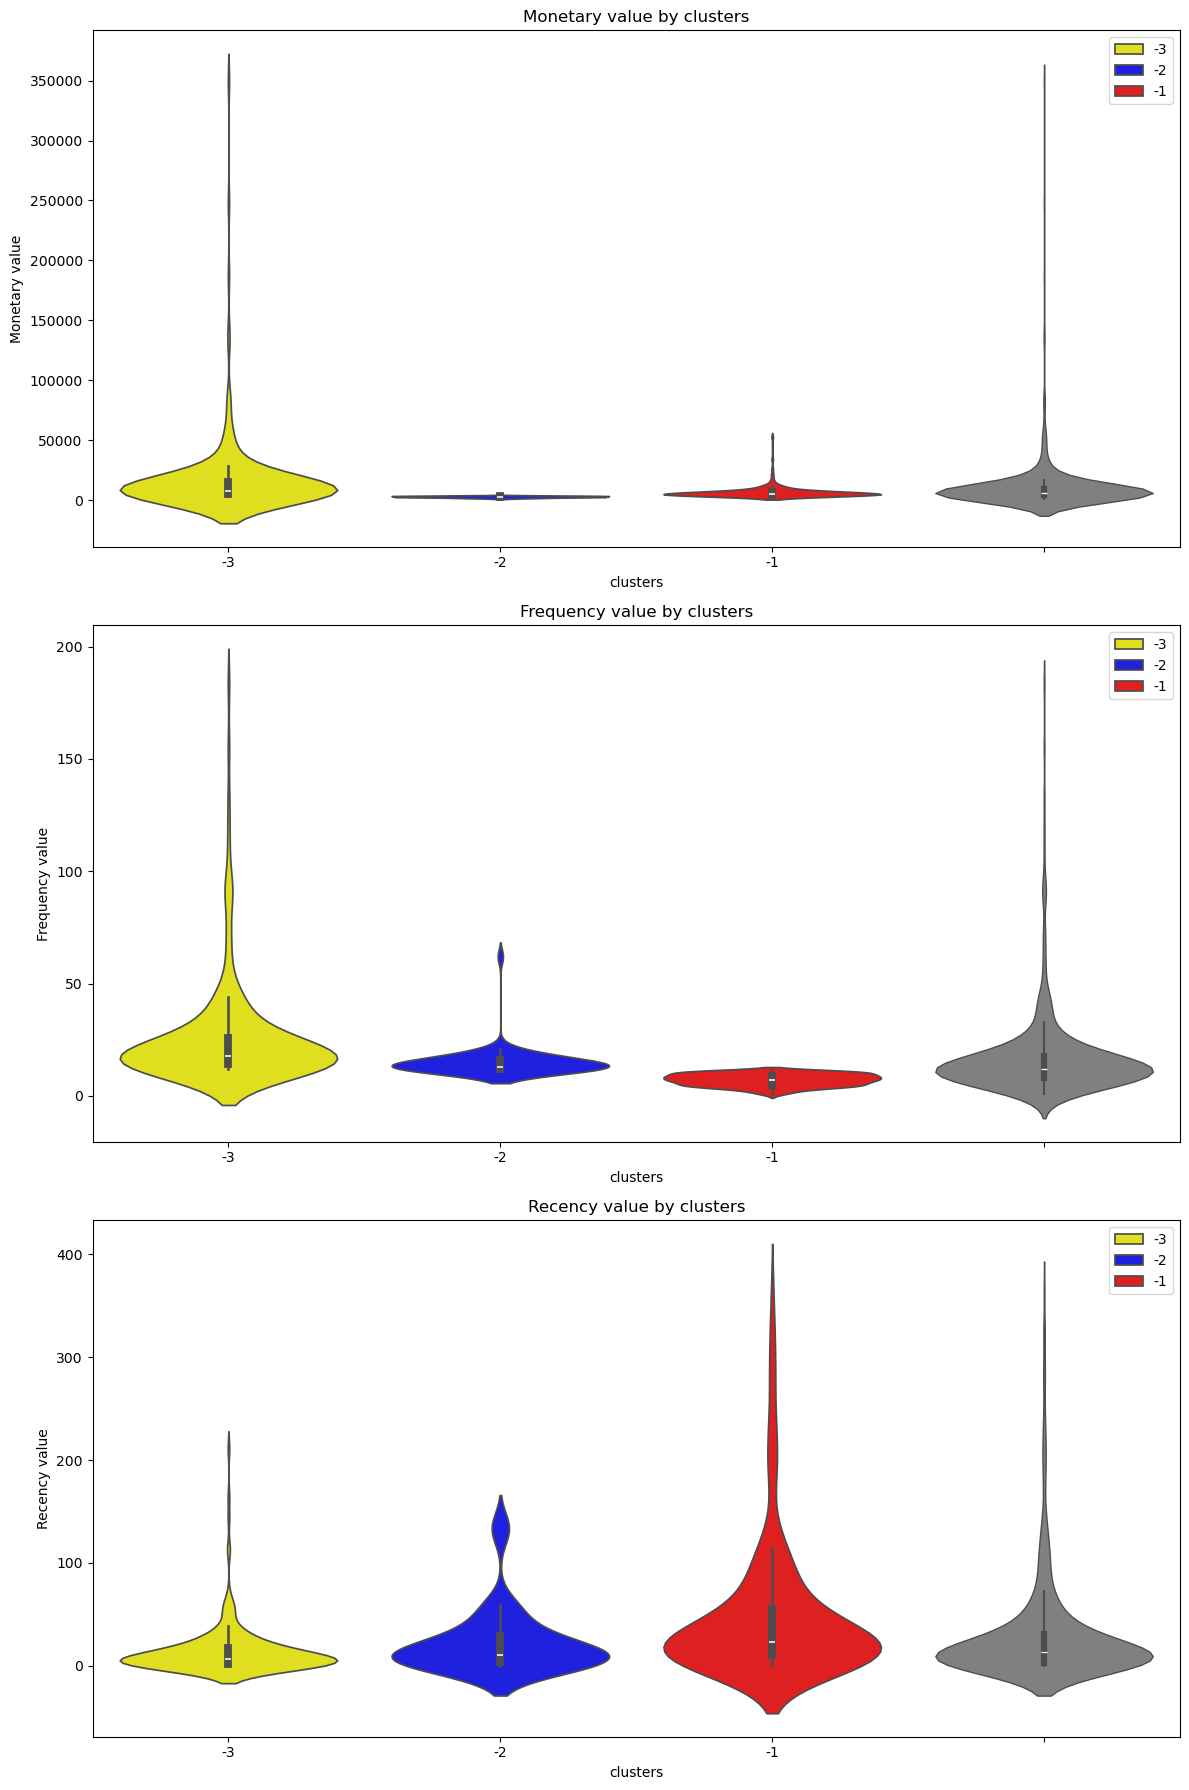

In [53]:
cluster_colors={-1:'red',
                -2:'blue',
                -3:'yellow'}


plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outlier_cluster_df['clusters'],y=outlier_cluster_df['MonetaryValue'],palette=cluster_colors,hue=outlier_cluster_df['clusters'])
sns.violinplot(y=outlier_cluster_df['MonetaryValue'],color='gray',linewidth=1)
plt.title('Monetary value by clusters')
plt.ylabel('Monetary value')


plt.subplot(3,1,2)
sns.violinplot(x=outlier_cluster_df['clusters'],y=outlier_cluster_df['Frequency'],palette=cluster_colors,hue=outlier_cluster_df['clusters'])
sns.violinplot(y=outlier_cluster_df['Frequency'],color='gray',linewidth=1)
plt.title('Frequency value by clusters')
plt.ylabel('Frequency value')

plt.subplot(3,1,3)
sns.violinplot(x=outlier_cluster_df['clusters'],y=outlier_cluster_df['Recency'],palette=cluster_colors,hue=outlier_cluster_df['clusters'])
sns.violinplot(y=outlier_cluster_df['Recency'],color='gray',linewidth=1)
plt.title('Recency value by clusters')
plt.ylabel('Recency value')

plt.tight_layout()
plt.show()



cluster -3(Monetary & Frequency Outliers): DELIGHT

The most valuable customer who make frequent high value purchases.They are the top-tire customers,who require special attention

Potential Strategy: Special VIP program to maintaing a continuous engagement and special offers

cluster -2(Frequency Outliers): UPSELL

This cluster represent frequent buyers who spent low on every purchase. These customer are engaged but can be might benifit by upselling.

Potential Strategy: Loyalty program or bundle deals to increase their spend on each purchase

cluster -1(Monetary Outliers): PAMPER

This cluster are the high spenders but not a frequent spenders

Potential Strategy: Focus on Loyalty program, and luxury services that cater their high spending capacity.

In [54]:
cluster_labels={0:'RETAIN',
                1:'RE-ENGAGE',
                2:'NURTURE',
                3:'REWARD',
                -1:'PAMPER',
                -2:'UPSELL',
                -3:'DELIGHT'}

In [55]:
full_clustering_df=pd.concat([non_outliers_df,outlier_cluster_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,clusters
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [56]:
full_clustering_df['cluster_label']=full_clustering_df['clusters'].map(cluster_labels)

full_clustering_df.to_csv('clustered data with label')

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,clusters,cluster_label
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


# Visualisation

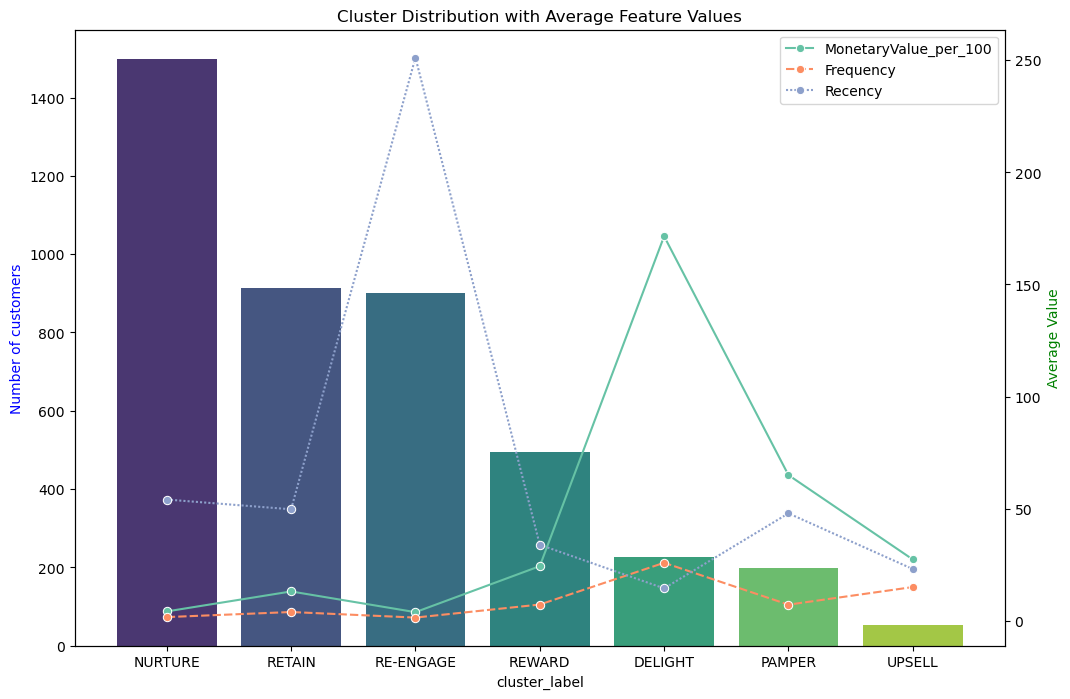

<Figure size 640x480 with 0 Axes>

In [58]:
cluster_counts=full_clustering_df['cluster_label'].value_counts()
full_clustering_df['MonetaryValue_per_100']=full_clustering_df['MonetaryValue']/100


feature_means=full_clustering_df.groupby('cluster_label')[['MonetaryValue_per_100','Frequency','Recency']].mean()


fig,axes1=plt.subplots(figsize=(12,8))

sns.barplot(x=cluster_counts.index,y=cluster_counts.values,ax=axes1,palette='viridis',hue=cluster_counts.index)
axes1.set_ylabel('Number of customers',color='b')
axes1.set_title('Cluster Distribution with Average Feature Values')

axex2 = axes1.twinx()

sns.lineplot(data=feature_means,ax=axex2,palette='Set2',marker='o')
axex2.set_ylabel('Average Value',color='green')


plt.show()
plt.savefig('clustered_customer_data.png')